In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introduction

This notebook uses the data set Stock_Bond_2004_to_2006.csv. Summary of the data can be found below. In the following, the S&P 500 index will be a proxy for
the market portfolio and the 90-day Treasury rate will serve as the risk-free
rate. we are trying to fit the model,

$$ i $$


$$ R_{j, t} = \mu_{f, t} + \beta_j (R_{M, t} - \mu_{f, t}) + \epsilon_{j, t} $$

Let $ R^*_{j,t} = R_{j,t} - \mu_{f,t} $ be the excess return on the $ j $-th security, and let $ R^*_{M,t} = R_{M,t} - \mu_{f,t} $, be the excess return on the market portfolio. Then, the equation can be written as:

$$
R^*_{j,t} = \beta_j R^*_{M,t} + \epsilon_{j,t} 
$$

This equation is a regression model without an intercept and with $ \beta_j $ as the slope. A more elaborate model includes an intercept $ \alpha_j $:

$$
R^*_{j,t} = \alpha_j + \beta_j R^*_{M,t} + \epsilon_{j,t}
$$




# Data Cleaning

In [12]:
df = pd.read_csv('./Stock_Bond_2004_to_2006.csv', index_col='Date')
df.head()

,DATE,Three_month_treasury,GM_Volume,GM_AC,F_Volume,F_AC,UTX_Volume,UTX_AC,CAT_Volume,CAT_AC,...,S&P_Volume,1 year Treasury Constant Maturity Rate,3-Year Treasury Constant Maturity Rate,10 year Treasury Constant Maturity Rate,30 year Treasury Constant Maturity Rate,Aaa Bond Yield,Baa Bond Yield,$/Euro,Yen/$,Brazil Real/$
Date,,,,,,,,,,,,,,,,,,,,,
2-Jan-04,1/2/2004,0.91,4660000,46.72,9030400,14.55,3227600,45.13,4172800,39.35,...,1153200000,1.31,2.47,4.38,NaN,5.73,6.70,1.2592,106.95,2.8840
5-Jan-04,1/5/2004,0.90,7324400,47.55,20069800,15.02,3031000,45.40,6184200,40.42,...,1578200064,1.35,2.51,4.41,NaN,5.70,6.68,1.2679,106.10,2.8580
6-Jan-04,1/6/2004,0.90,4793800,47.26,16760800,14.97,3754200,45.29,6190400,39.70,...,1494499968,1.30,2.38,4.29,NaN,5.63,6.61,1.2773,106.20,2.8575
7-Jan-04,1/7/2004,0.89,8304600,47.91,13801900,15.38,3413200,45.43,6203200,39.27,...,1704899968,1.29,2.36,4.27,NaN,5.61,6.57,1.2665,106.19,2.8690
8-Jan-04,1/8/2004,0.86,8282800,47.90,15805300,15.48,3793200,45.38,4844400,38.97,...,1868400000,1.29,2.37,4.27,NaN,5.63,6.53,1.2772,106.17,2.8500


In [13]:
prices = df.iloc[:, [3, 5, 7, 9, 11, 13, 15, 22]]
n = len(prices)
prices.head()

,GM_AC,F_AC,UTX_AC,CAT_AC,MRK_AC,PFE_AC,IBM_AC,SP_AC
Date,,,,,,,,
2-Jan-04,46.72,14.55,45.13,39.35,41.76,32.85,89.10,1108.48
5-Jan-04,47.55,15.02,45.40,40.42,42.60,33.73,90.56,1122.22
6-Jan-04,47.26,14.97,45.29,39.70,42.40,33.71,90.57,1123.67
7-Jan-04,47.91,15.38,45.43,39.27,42.45,34.00,90.30,1126.33
8-Jan-04,47.90,15.48,45.38,38.97,42.67,33.68,90.55,1131.92


In [14]:
df.head()

,DATE,Three_month_treasury,GM_Volume,GM_AC,F_Volume,F_AC,UTX_Volume,UTX_AC,CAT_Volume,CAT_AC,...,S&P_Volume,1 year Treasury Constant Maturity Rate,3-Year Treasury Constant Maturity Rate,10 year Treasury Constant Maturity Rate,30 year Treasury Constant Maturity Rate,Aaa Bond Yield,Baa Bond Yield,$/Euro,Yen/$,Brazil Real/$
Date,,,,,,,,,,,,,,,,,,,,,
2-Jan-04,1/2/2004,0.91,4660000,46.72,9030400,14.55,3227600,45.13,4172800,39.35,...,1153200000,1.31,2.47,4.38,NaN,5.73,6.70,1.2592,106.95,2.8840
5-Jan-04,1/5/2004,0.90,7324400,47.55,20069800,15.02,3031000,45.40,6184200,40.42,...,1578200064,1.35,2.51,4.41,NaN,5.70,6.68,1.2679,106.10,2.8580
6-Jan-04,1/6/2004,0.90,4793800,47.26,16760800,14.97,3754200,45.29,6190400,39.70,...,1494499968,1.30,2.38,4.29,NaN,5.63,6.61,1.2773,106.20,2.8575
7-Jan-04,1/7/2004,0.89,8304600,47.91,13801900,15.38,3413200,45.43,6203200,39.27,...,1704899968,1.29,2.36,4.27,NaN,5.61,6.57,1.2665,106.19,2.8690
8-Jan-04,1/8/2004,0.86,8282800,47.90,15805300,15.48,3793200,45.38,4844400,38.97,...,1868400000,1.29,2.37,4.27,NaN,5.63,6.53,1.2772,106.17,2.8500


In [27]:
year_data = df.iloc[1:n, 1] / 365
price_changes = 100 * (prices.iloc[1:n].values / prices.iloc[0:n-1].values - 1)
df2 = pd.DataFrame(np.column_stack((year_data, price_changes)), columns=['Year_Data'] + [prices.columns[i] for i in range(len(prices.columns))])

In [75]:
df2 = df2.rename(columns = {'Year_Data':'treasury'})
rf = df2.iloc[:,0]
ExtRt = df2.iloc[:, 1:].subtract(rf, axis = 0)
market = ExtRt.iloc[:,-1]
stockRet = ExtRt.iloc[:, 1:-1]

In [120]:
import statsmodels.api as sm
import seaborn as sns

In [130]:
col_name = stockRet.columns
X = sm.add_constant(market)
res = {}
params = []
for name in col_name:
    y = stockRet[name]
    model = sm.OLS(y, X).fit()
    res[name] = model.resid
    params.append(model.params[1])
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   F_AC   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     159.5
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           6.05e-33
Time:                        13:46:52   Log-Likelihood:                -1318.4
No. Observations:                 672   AIC:                             2641.
Df Residuals:                     670   BIC:                             2650.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0977      0.067     -1.468      0.1

/var/folders/qn/03t76jqd1t31l24v1ryyyxkr0000gn/T/ipykernel_3390/3823572675.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  params.append(model.params[1])
/var/folders/qn/03t76jqd1t31l24v1ryyyxkr0000gn/T/ipykernel_3390/3823572675.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  params.append(model.params[1])
/var/folders/qn/03t76jqd1t31l24v1ryyyxkr0000gn/T/ipykernel_3390/3823572675.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[p

The p-value for all the alpha are larger than 0.05 level, which indicates that these alphas are not significant

# Residuals Pair plot

/Users/tonghuang/opt/anaconda3/envs/nlp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tonghuang/opt/anaconda3/envs/nlp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tonghuang/opt/anaconda3/envs/nlp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tonghuang/opt/anaconda3/envs/nlp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

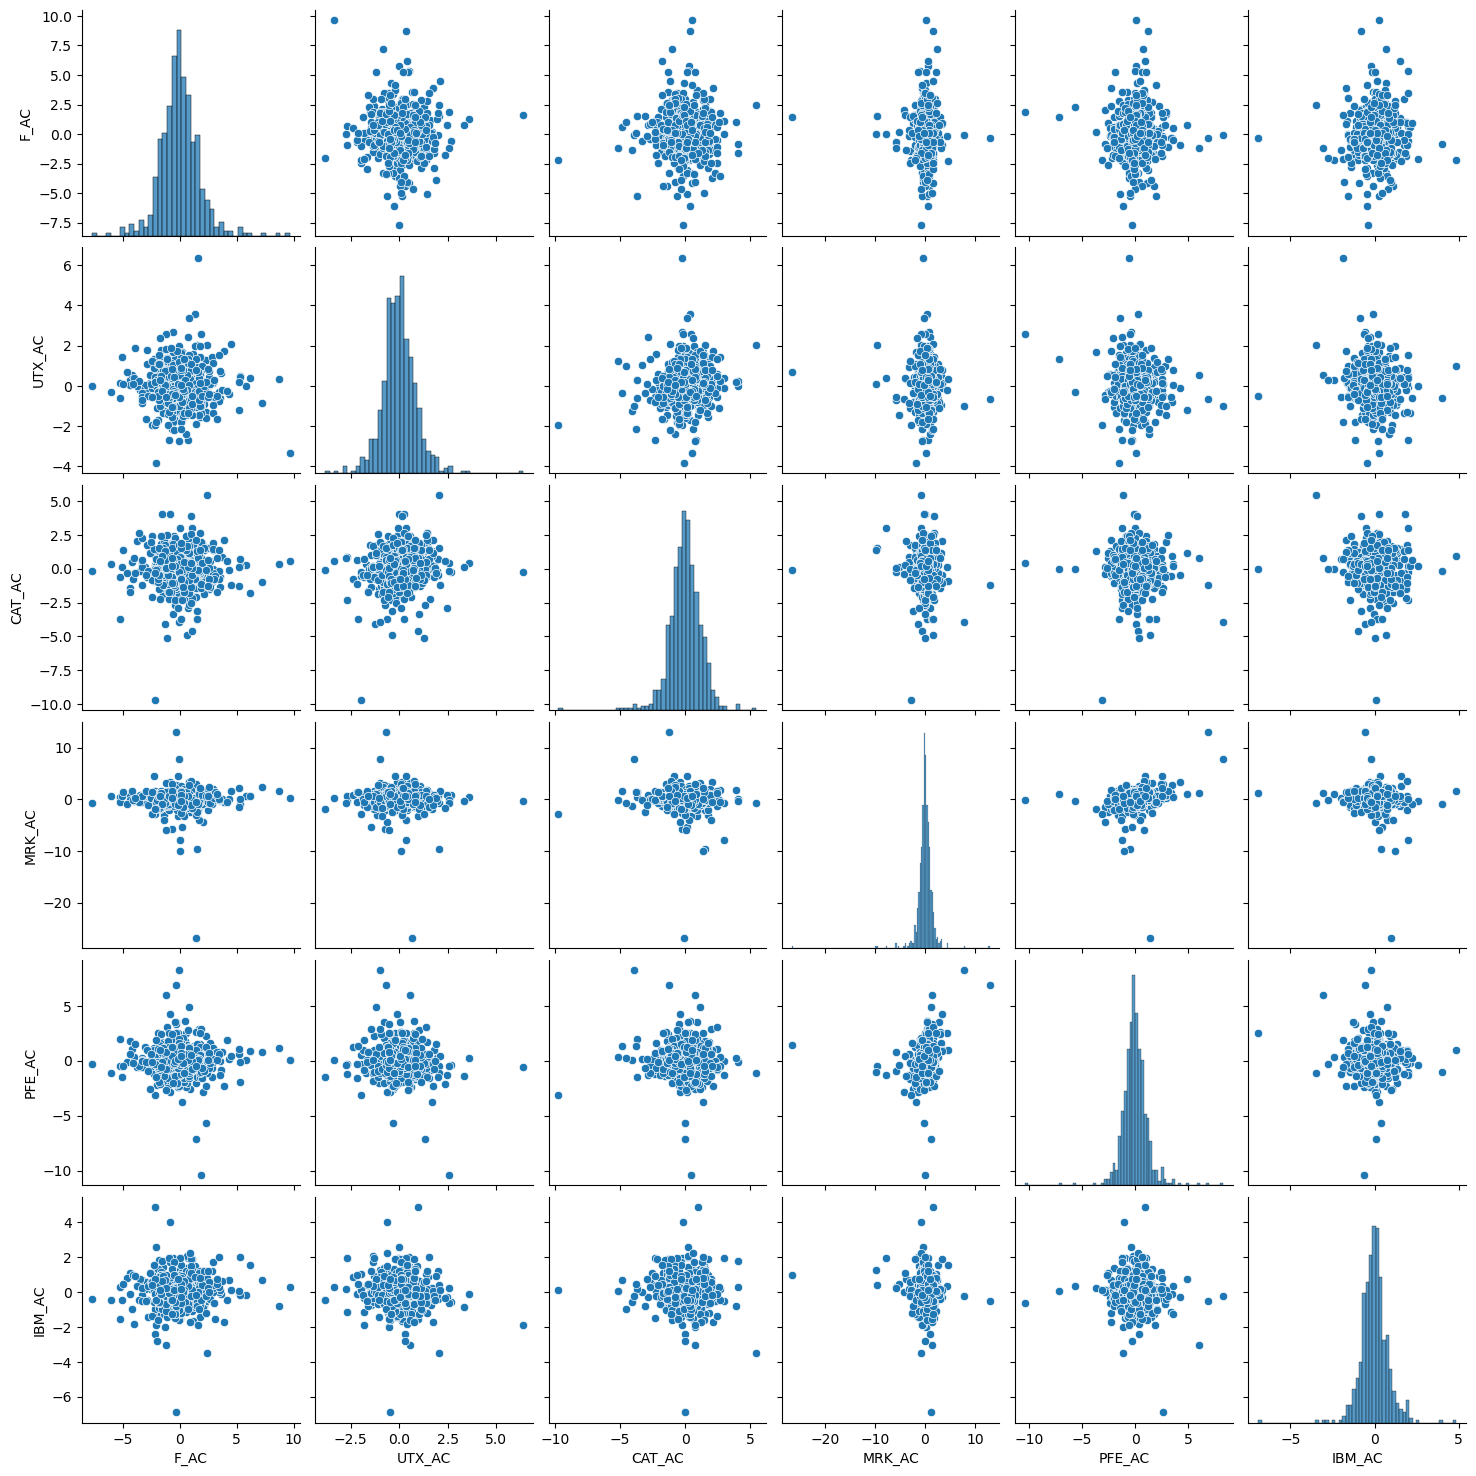

In [127]:
df_res = pd.DataFrame(res)
sns.pairplot(df_res)

One might consider
reestimating the betas and the residuals with a no-intercept model. However,
since the estimated alphas were close to zero, forcing the alphas to be exactly zero will not change the estimates of the betas or the residuals by much. So we will not reestimate.

In [135]:
betas = {}
expected_excess_returns = {}
sample_means = {}
X = sm.add_constant(market)

for name in col_name:
    y = stockRet[name]
    model = sm.OLS(y, X).fit()
    betas[name] = model.params[1]
    expected_excess_returns[name] = betas[name] * market.mean()
    sample_means[name] = y.mean()

/var/folders/qn/03t76jqd1t31l24v1ryyyxkr0000gn/T/ipykernel_3390/3647018021.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[name] = model.params[1]


In [137]:
print("Expected Excess Returns using Market Model:", expected_excess_returns)

Expected Excess Returns using Market Model: {'F_AC': 0.024028067314489025, 'UTX_AC': 0.01895792694153578, 'CAT_AC': 0.027366779158838114, 'MRK_AC': 0.01455741123629067, 'PFE_AC': 0.01843426919991532, 'IBM_AC': 0.01594115307773801}


In [138]:
print("Sample Means of Excess Returns:", sample_means)

Sample Means of Excess Returns: {'F_AC': -0.07363385680536975, 'UTX_AC': 0.04852401349889769, 'CAT_AC': 0.08420717165046922, 'MRK_AC': 0.007102949553357261, 'PFE_AC': -0.021792386959705617, 'IBM_AC': -0.016312497636387403}


As shown above, the means of excess return are not really close to each others. We see that the estimates from the one-factor model are similar to each other
and all are positive. The estimates using sample means are dissimilar to each
other and four are negative while three are positive. Thus, the one-factor model
produces much less variable estimates of mean returns.

# The correlation matrix of the residuals.

In [142]:
df_res.corr()

,F_AC,UTX_AC,CAT_AC,MRK_AC,PFE_AC,IBM_AC
F_AC,1.000000,-0.007140,0.028947,0.012793,0.011422,0.035754
UTX_AC,-0.007140,1.000000,0.149775,-0.015398,-0.111028,-0.069486
CAT_AC,0.028947,0.149775,1.000000,-0.075725,-0.064962,-0.083423
MRK_AC,0.012793,-0.015398,-0.075725,1.000000,0.283274,-0.078170
PFE_AC,0.011422,-0.111028,-0.064962,0.283274,1.000000,-0.046057
IBM_AC,0.035754,-0.069486,-0.083423,-0.078170,-0.046057,1.000000


The largest correlation of residuals between these companies are PFE and MRK. The correlation is the largest because both companies are pharmacy company